<a href="https://colab.research.google.com/github/Minch13r/DeepLearn/blob/main/diabetes_1%EC%A3%BC%EC%B0%A8_%EB%A6%AC%ED%8F%AC%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 로드 및 전처리

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


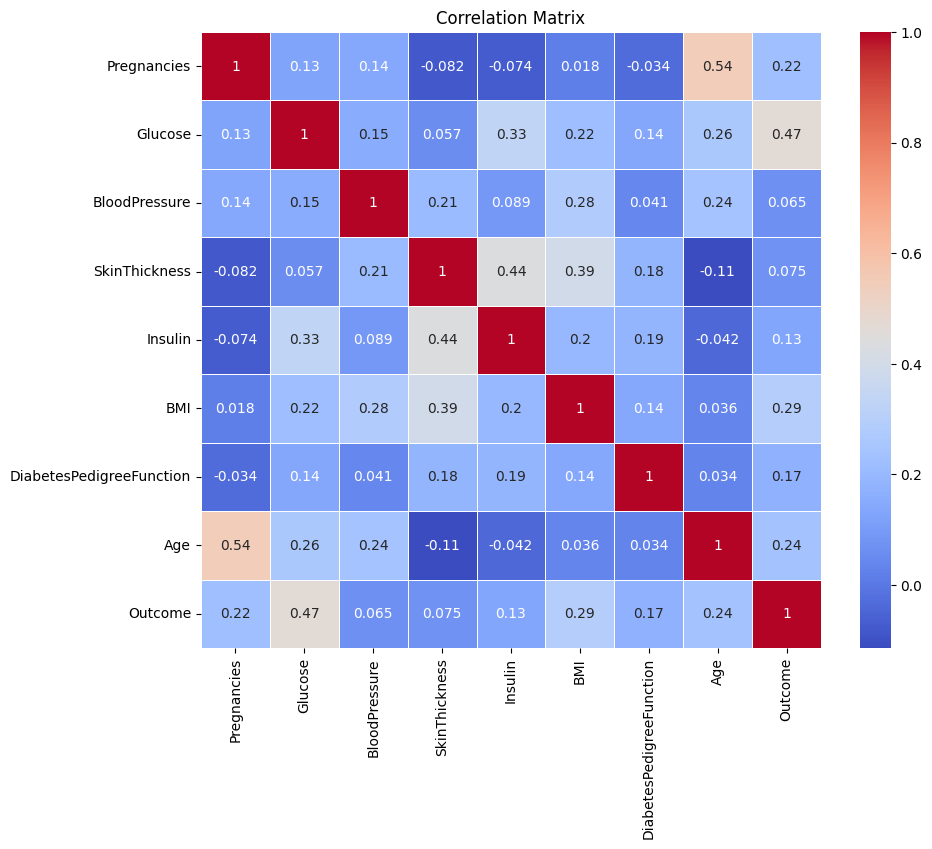

<ipython-input-1-2859e4dca149>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='coolwarm')


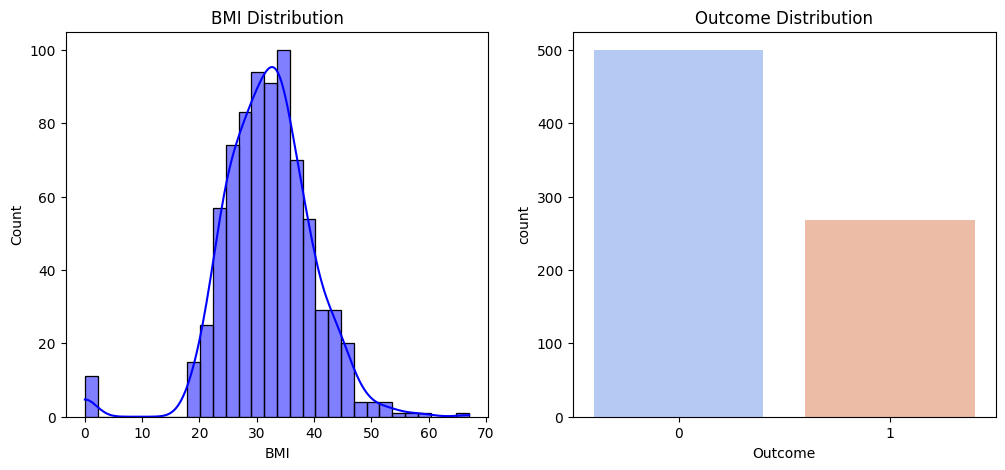

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# rawgithub에서 당뇨병 데이터 로드
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv"
df = pd.read_csv(url)

# 데이터 확인
print(df.head())

# 상관관계 행렬 시각화 (히트맵)
plt.figure(figsize=(10, 8))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 데이터 분포 (BMI와 Outcome 분포)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], kde=True, bins=30, color='blue')
plt.title('BMI Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Outcome', data=df, palette='coolwarm')
plt.title('Outcome Distribution')
plt.show()


2. 머신러닝 모델을 사용한 분류 (SVM, Logistic Regression, Random Forest, Decision Tree, KNN)

In [2]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Feature와 Label 분리
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_preds))

# 2. Logistic Regression (LR)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_preds))

# 3. Random Forest (RF)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

# 4. Decision Tree (DT)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_preds))

# 5. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, knn_preds))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg      

3. Dense Layer만 사용한 딥러닝 분류 모델

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.2991 - loss: 0.7606 - val_accuracy: 0.5691 - val_loss: 0.6955
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6820 - loss: 0.6665 - val_accuracy: 0.6992 - val_loss: 0.6477
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7170 - loss: 0.6028 - val_accuracy: 0.7154 - val_loss: 0.6092
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7487 - loss: 0.5547 - val_accuracy: 0.7398 - val_loss: 0.5666
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7454 - loss: 0.5153 - val_accuracy: 0.7398 - val_loss: 0.5339
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7635 - loss: 0.4954 - val_accuracy: 0.7398 - val_loss: 0.5183
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7865 - loss: 0.4398 - val_accuracy: 0.7317 - val_loss: 0.5054
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7866 - loss: 0.4542 - val_accuracy: 0.7317 - va

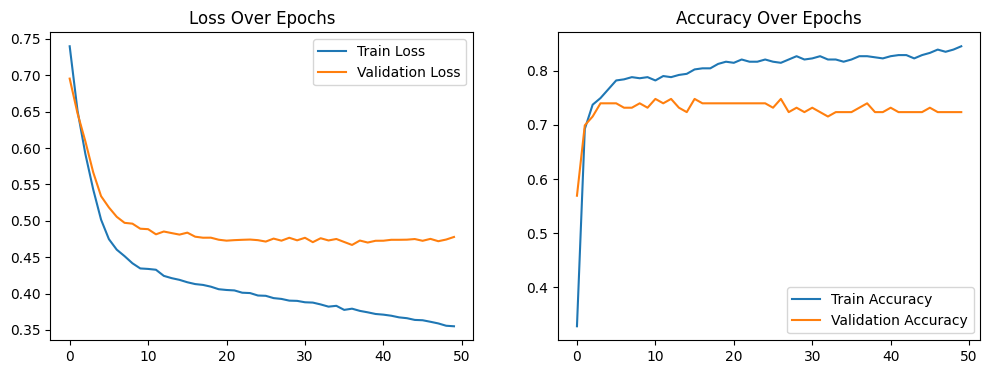

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 딥러닝 모델 정의
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류이므로 sigmoid 사용

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 테스트 데이터로 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()


4. Outcome을 제거하고 BMI를 예측하는 회귀 모델

Linear Regression MSE: 52.2406, R2 Score: 0.2651


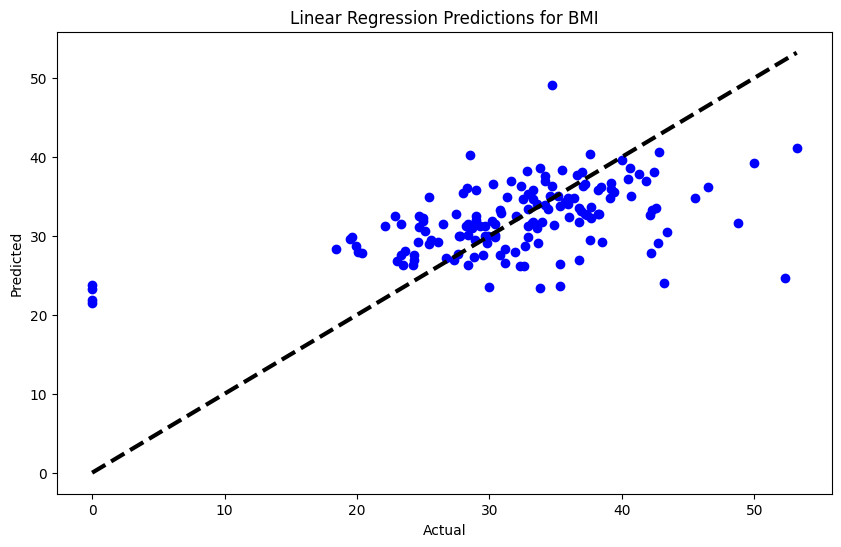

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Outcome 삭제, BMI를 예측할 타겟으로 설정
X_reg = df.drop(['Outcome', 'BMI'], axis=1)
y_reg = df['BMI']

# 데이터 분할
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 1. 선형 회귀 모델
lr_reg_model = LinearRegression()
lr_reg_model.fit(X_train_reg, y_train_reg)
lr_reg_preds = lr_reg_model.predict(X_test_reg)

# 평가
mse_lr = mean_squared_error(y_test_reg, lr_reg_preds)
r2_lr = r2_score(y_test_reg, lr_reg_preds)
print(f'Linear Regression MSE: {mse_lr:.4f}, R2 Score: {r2_lr:.4f}')

# 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, lr_reg_preds, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Predictions for BMI')
plt.show()


5. Dense Layer만 사용한 딥러닝 회귀 모델

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2147.8518 - val_loss: 152.9069
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 163.8859 - val_loss: 151.2334
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 134.9243 - val_loss: 96.5736
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 113.3023 - val_loss: 85.0716
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 104.7655 - val_loss: 80.1443
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 89.7255 - val_loss: 76.4540
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 87.3338 - val_loss: 72.6124
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 78.5223 - val_loss: 69.2195
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 74.8004 - val_loss: 65.6918
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.9830 - val_loss: 62.8735
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 82.0454 - val_loss: 60.7341
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11m

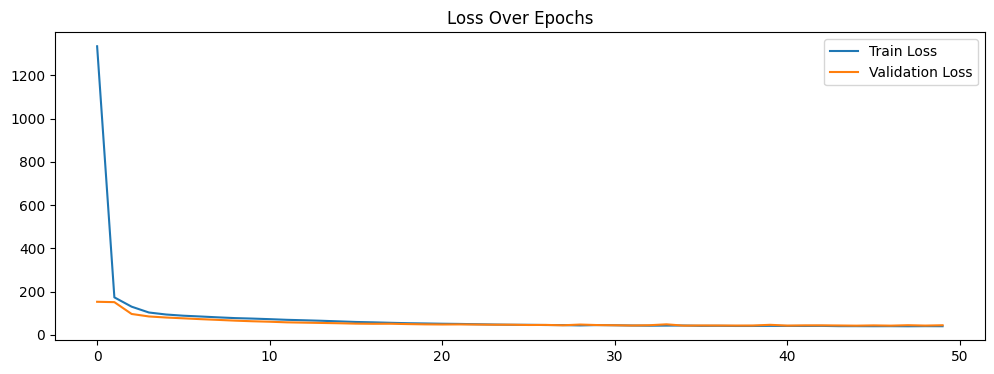

In [5]:
# 딥러닝 회귀 모델 정의
reg_model = Sequential()
reg_model.add(Dense(64, activation='relu', input_shape=(X_train_reg.shape[1],)))
reg_model.add(Dense(32, activation='relu'))
reg_model.add(Dense(1))  # 회귀이므로 활성화 함수 없음

# 모델 컴파일
reg_model.compile(optimizer='adam', loss='mse')

# 모델 학습
history_reg = reg_model.fit(X_train_reg, y_train_reg, epochs=50, batch_size=32, validation_split=0.2)

# 테스트 데이터로 평가
loss_reg = reg_model.evaluate(X_test_reg, y_test_reg)
print(f'Test MSE: {loss_reg:.4f}')

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()
